# Analyzing Stock Data Using Electrophysiological Analyses
### Torben Noto

In [41]:
%config InlineBackend.figure_format = 'retina'
%pylab inline
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import pandas as pd
import scipy.io
import collections
from numpy import genfromtxt
import csv
import requests
import time
from scipy.stats.mstats import zscore
import scipy.stats
import scipy.signal
from foof.fit import FOOF
import matplotlib.patches as patches
from itertools import groupby
import pacpy

Populating the interactive namespace from numpy and matplotlib


# Getting and Cleaning the Data

###  Loading Stock Information

In [2]:
path_to_csv = '/Users/Torben/Documents/Blog/neuroscience_stock_analysis/'
stock_info_csv = 'stock_info.csv'
stock_info_array = []

                    
with open(path_to_csv+stock_info_csv, 'rU') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    for row in csvreader:
        stock_info_array.append(row)

### Scraping data from google finance

In [18]:

def parse_data(page):
    '''Cleans up a page of messy csv data'''
    opening_prices = []
    closing_prices = []
    unparsed_data = page.content.split('\n')
    for dateline in unparsed_data[1:len(unparsed_data)-1]:
        semi_parsed = dateline.split(',')
        opening_prices.append(float(semi_parsed[1]))
        closing_prices.append(float(semi_parsed[2]))
        
    result = [None]*(len(opening_prices)+len(closing_prices))
    result[::2] = opening_prices
    result[1::2] = closing_prices
    return result

names = []
labels = np.zeros(50) #  labels corresponding to categories
opening_prices = np.zeros((50,500)) #  opening and closing prices of stocks
i=0 #  counter to handle bad data
label_bag = dict() #  indexing labels
label_ind = 0 #  indexing labels
    
for stock in stock_info_array[1:]:
    print stock[1]
    try:
        page_name = "http://www.google.com/finance/historical?output=csv&q=" + stock[1].lower()
        time.sleep(rand(1))
        page = requests.get(page_name)
        opening_prices = parse_data(page)
        opening_prices[i,:] = opening_prices
        names.append(stock[0])
        if stock[2] in label_bag:
            labels[i] = label_ind
        else:
            label_bag[stock[2]] = 1
            label_ind += 1
            labels[i] = label_ind
            
        i+=1
    
    except ValueError:
        print 'Missing '+ stock[0]
print str(i) + ' total Stocks found'

#chopping zero tail off
labels = labels[:i]
opening_prices = opening_prices[:i,:]


CVC
AMZN
NFLX
Missing Netflix
TWC
NKE
TSN
HRL
RAI
CPB
MKC
CAM
CPGX
Missing Columbia Pipeline Group
PSX
VLO
XOM
NDAQ
PGR
CINF
Missing Cincinnati Financial Group
AIZ
ICE
EW
HSIC
CI
BAX
Missing Baxter Intl
XRAY
GE
RTN
RSG
NOC
EFX
ARG
VMC
AVY
WRK
Missing Westrock
NEM
EXR
Missing Extra Space Storage
PSA
Missing Public Storage
EQIX
Missing Equinix
O
FRT
NVDA
GOOGL
Missing Alphabet inc
FB
ATVI
VRSN
NI
TE
GAS
SCG
ED
41 total Stocks found


### Saving Data

In [19]:
np.save('sandbox_values',opening_prices)
np.save('labels',labels)
with open('stock_names.csv', 'wb') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for name in names:
        writer.writerow(name)

### Loading Saved Data

[  1.   1.   1.   1.   2.   2.   2.   2.   2.   3.   3.   3.   3.   4.   4.
   4.   4.   5.   5.   5.   5.   6.   6.   6.   6.   6.   7.   7.   7.   7.
   8.   8.   9.   9.   9.   9.  10.  10.  10.  10.  10.]
['Cablevision Systems', 'Amazon', 'Time Warner Cable', 'Nike', 'Tyson', 'Hormel', 'Reynolds American', 'Campbells Soup', 'McCormick & co', 'Cameron International', 'Phillips 66', 'Valero Energy', 'Exxon', 'Nasdaq', 'Progressive', 'Assurant ', 'Intercontinental Exchange', 'Edwards Lifesciences', 'Schein Henry', 'Cigna Corperation', 'Dentsply', 'General Electric', 'Raytheon', 'Republic Services', 'Northrop Grumman', 'Equifax', 'Airgas', 'Vulcan', 'Avery Dennison', 'Newmont Mining', 'Realty Income', 'Federal Realty', 'Nvidia', 'Facebook inc', 'Activision', 'Verisign', 'Nisource', 'Teco', 'AGL resources', 'Scana corp', 'Consolidated Edison']


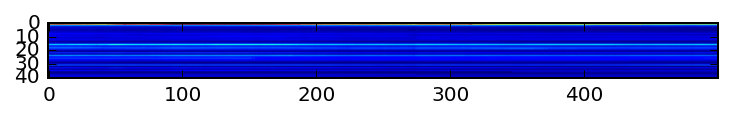

In [20]:
sandbox_values = np.load('/Users/Torben/Documents/Blog/neuroscience_stock_analysis/sandbox_values.npy')
plt.imshow(sandbox_values)
labels = np.load('/Users/Torben/Documents/Blog/neuroscience_stock_analysis/labels.npy')
print labels
path_to_names = '/Users/Torben/Documents/Blog/neuroscience_stock_analysis/stock_names.csv'

names = []
with open(path_to_names, 'rU') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    for row in csvreader:
        names.append("".join(row))
print names

### Normalizing and plotting data

ValueError: x and y must have same first dimension

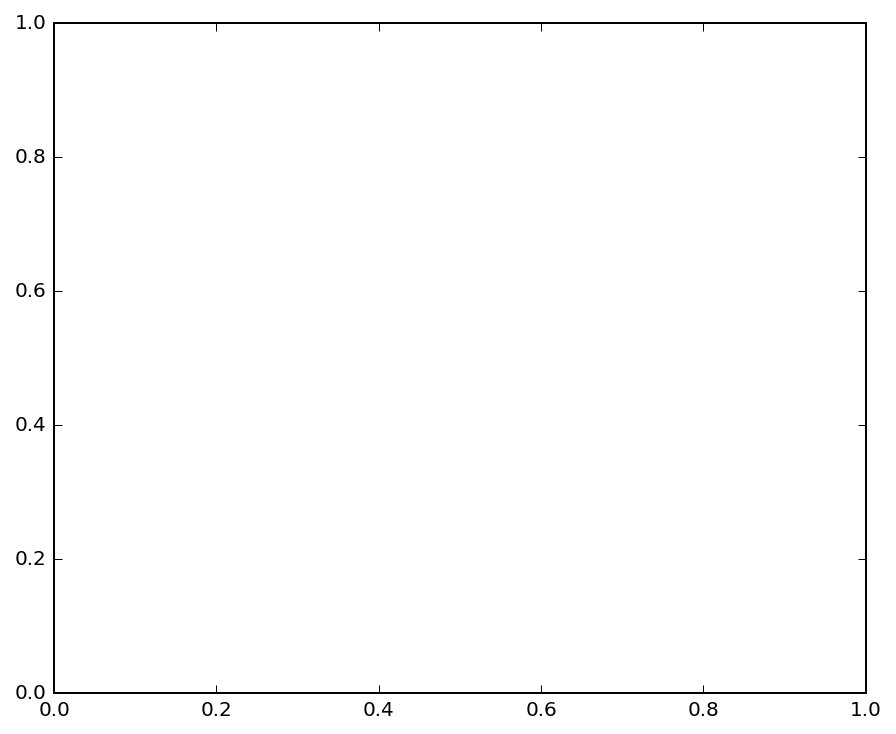

In [190]:
normalized_dat = scipy.stats.mstats.zscore(opening_prices.T).T

plt.figure(figsize=(16,6))
ax1 = plt.subplot(1,2,1)
for x in xrange(len(opening_prices))
ax1.plot(np.arange(opening_prices.T[x,:])
ax1.set_title('One year of Opening and Closing Values for 50 stocks')
ax1.set_xlabel('Market Days after Feb 10')
ax1.set_ylabel('Value')
ax2 = plt.subplot(1,2,2)
ax2.plot(normalized_dat.T[x,:])
ax2.set_title('One year of Opening and Closing Values for 50 stocks')
ax2.set_xlabel('Market Days after March 10')
ax2.set_ylabel('Normalized Value')

# Analyzing Data

### Correlating all stocks with eachother, within group between group

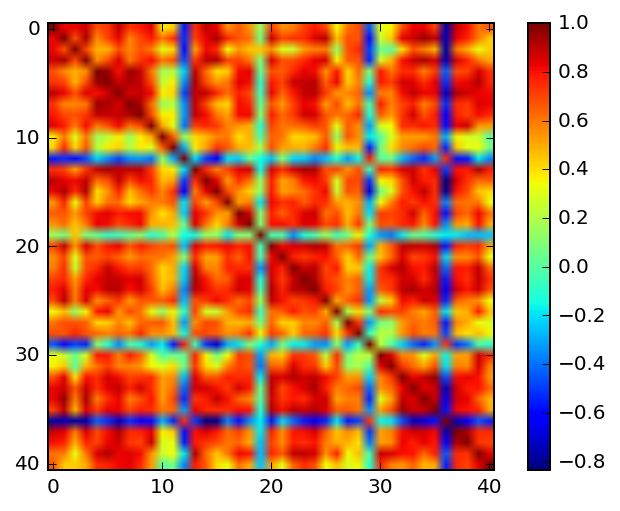

In [31]:
correlation_matrix = np.corrcoef(normalized_dat)
plt.imshow(correlation_matrix)
plt.colorbar()

It looks like 4 stocks negatively correlate with everything else. What's up with that?
Let's find those and figure out which ones those are

### What stocks correlate the highest and lowest with other stocks?

In [28]:
mean_correlations = np.mean(correlation_matrix,0)
sorted_stock_names = [names[i[0]] for i in sorted(enumerate(mean_correlations), key=lambda x:x[1])]
sorted_stocks = [i[1] for i in sorted(enumerate(mean_correlations), key=lambda x:x[1])]
typical_stocks = sorted_stock_names[0:5]
oddball_stocks = sorted_stock_names[len(sorted_stock_names)-5:len(sorted_stock_names)]

print '\n'
print "These stocks correlate negatively with most other stocks: " + str(typical_stocks)
print '\n'
print "These stocks correlate positively with most other stocks: " + str(oddball_stocks)
print '\n'



These stocks correlate negatively with most other stocks: ['Nisource', 'Exxon', 'Newmont Mining', 'Cigna Corperation', 'Phillips 66']


These stocks correlate positively with most other stocks: ['Dentsply', 'Republic Services', 'Facebook inc', 'Nasdaq', 'Northrop Grumman']




### What Stocks and Categories Move with Eachother?

In [37]:
# some helpful functions and crunching data

def within_group_corr(ind):
    """Analyzes how a stock moves compared to other stocks in its category"""
    this_stock = opening_prices[ind,:]
    this_label = labels[ind]
    rvals = []
    pvals = []
    for x in xrange(len(labels)):
        if labels[x] == this_label:
            if x != ind:
                that_stock = opening_prices[x,:]
                r,p = scipy.stats.pearsonr(this_stock,that_stock)
                rvals.append(r)
                pvals.append(p)
    return rvals,pvals

def all_group_corr(ind):
    """Analyzes how a stock moves compared to other stocks in its category"""
    this_stock = opening_prices[ind,:]
    this_label = labels[ind]

    rvals = []
    pvals = []
    for x in xrange(len(set(labels))+1):
        category = [val for val in xrange(len(labels)) if labels[val] == x]
        r_temp = []
        p_temp = []
        for stock in category:
            that_stock = opening_prices[stock,:]
            r,p = scipy.stats.pearsonr(this_stock,that_stock)
            r_temp.append(r)
            p_temp.append(p)
        rvals.append(r_temp)
        pvals.append(p_temp)
    rvals = rvals[1:]
    pvals = pvals[1:]
    return rvals,pvals

def category_corr(label):
    """Analyzes how a group of stocks moves compared to other groups"""
    rvals = []
    pvals = []
    label_inds = [i for i,j in enumerate(labels) if j == label]
    this_mean_label = np.mean(normalized_dat[label_inds,:],0)
    for that_label in set(labels):
        that_label_inds = [i for i,j in enumerate(labels) if j == that_label]
        that_mean_label = np.mean(normalized_dat[that_label_inds,:],0)
        r,p = scipy.stats.pearsonr(this_mean_label,that_mean_label)
        rvals.append(r)
        pvals.append(p)
    return rvals,pvals
"""
#rvals,pvals = between_group_corr(0)
all_r = np.zeros((len(set(labels)),len(set(labels))))
for label in set(labels):
    rvals,pvals = category_corr(label)
    all_r[label-1,:] = rvals

plt.imshow(all_r)
"""

within_group_corrs = []
for stock in xrange(len(normalized_dat)):
    r,p = within_group_corr(stock)
    within_group_corrs.append(np.mean(r))


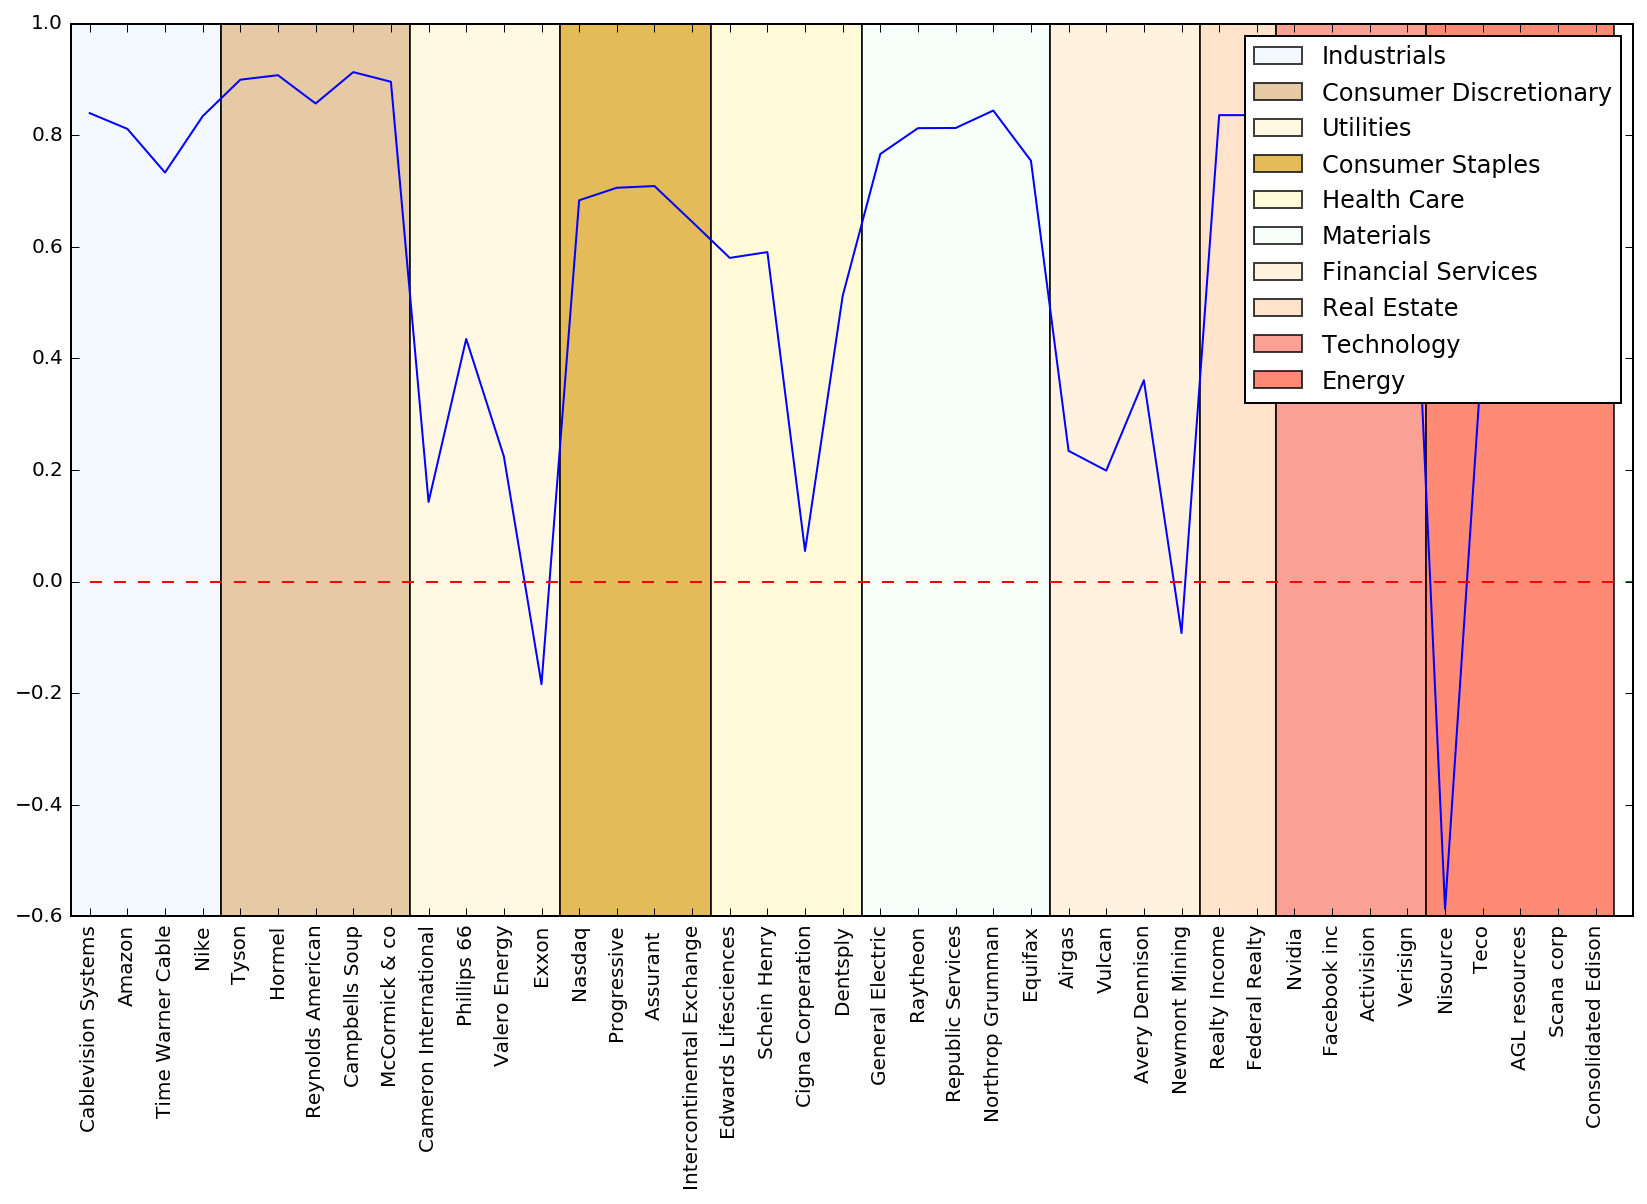

In [176]:
# plotting data (using the weirdest colors I could find)
label_references = list(set([row[2] for row in stock_info_array]))[1:]
rectinds = [len(list(group)) for key, group in groupby(labels)]
plt.figure(figsize=(14,8))
ax1 = plt.subplot(1,1,1);
ax1.set_xticks(range(0,len(normalized_dat)+1))
ax1.set_xticklabels(names,rotation='vertical')
ax1.set_ylim([-0.6,1])
rect_sum = 0
colorlist = ['aliceblue','burlywood','cornsilk','goldenrod','lemonchiffon','mintcream','papayawhip','peachpuff','salmon','tomato']
for i in xrange(len(set(labels))):
    ax1.add_patch(
        patches.Rectangle(
            (rect_sum-0.5, -0.6),   # (x,y)
            rectinds[i],          # width
            1+0.6,          # height
            alpha=0.75,
            label=label_references[i],
            facecolor=colorlist[i]
        )
    )
    rect_sum+=rectinds[i]
ax1.legend()
ax1.plot(within_group_corrs)
ax1.plot([0,len(labels)],[0,0],'r--')

### How do stocks correlate within and between categories?

In [94]:
# code

### How do different categories of stocks correlate?

### What do spectral features of stocks look like?
What time windows contribute to most of the change in the stock's value over time? Some stocks might change rapidly day to day and some might change slowly over the course of the year. We can use spectral analyses to examine these questions.

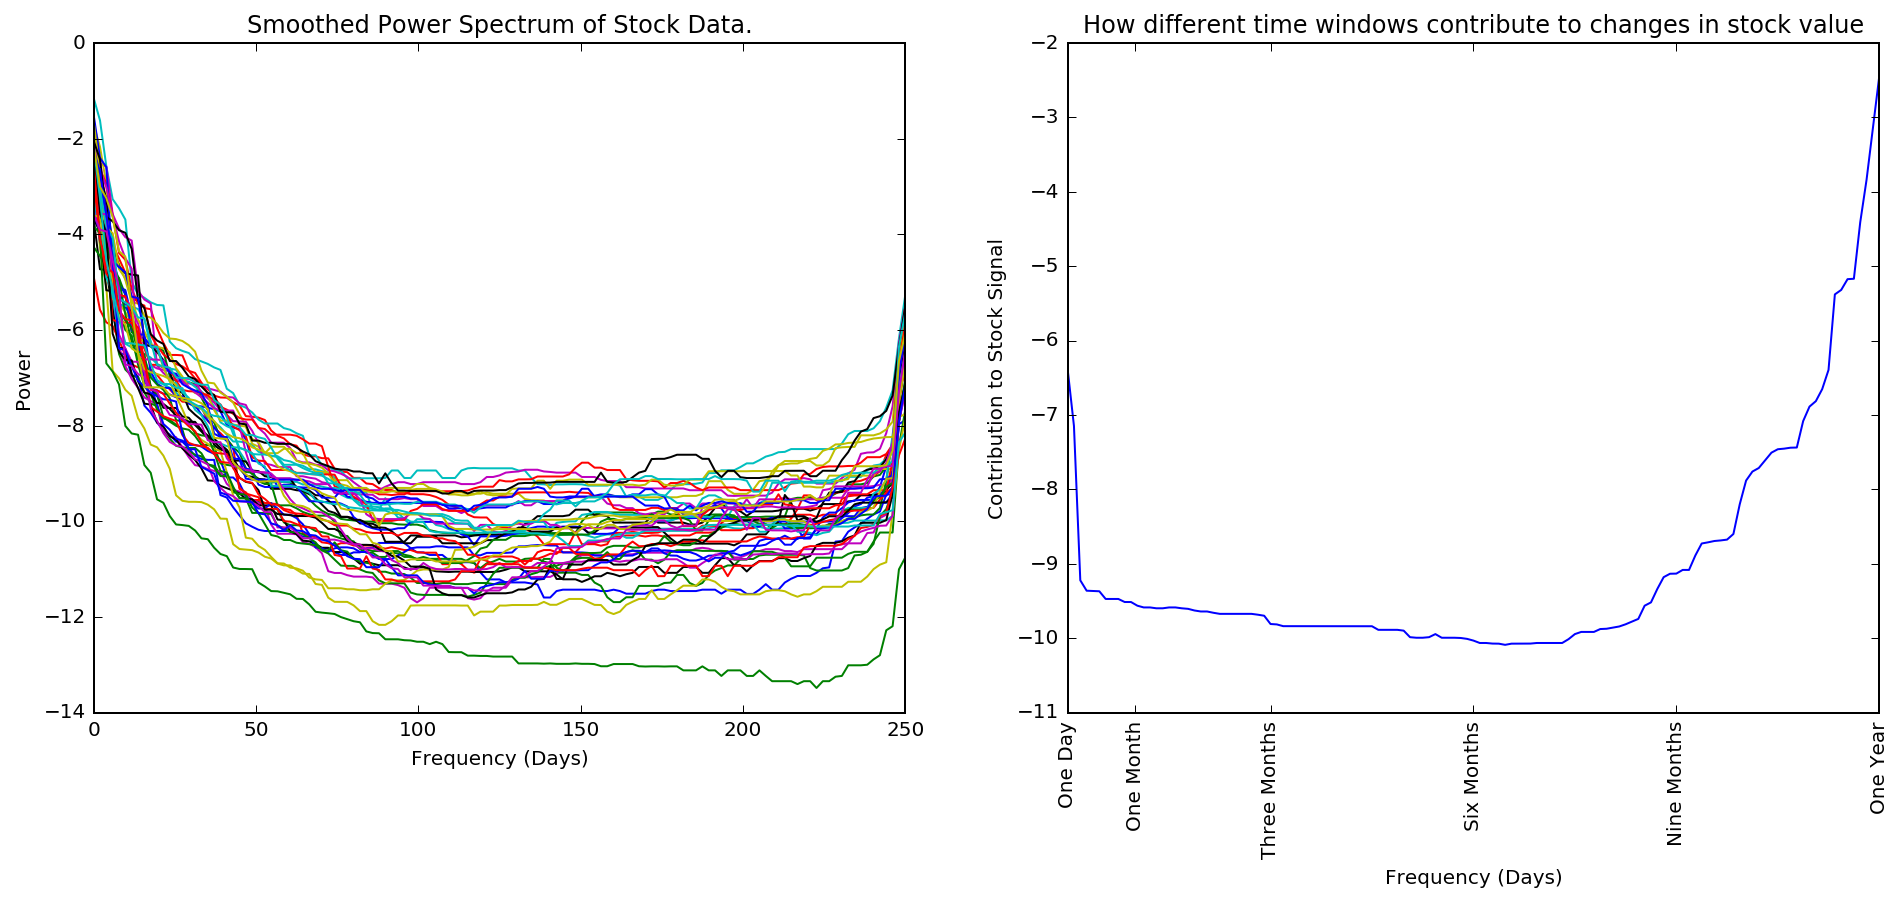

In [29]:
f,pspec = scipy.signal.welch(normalized_dat,fs=500)

plt.figure(figsize=(16,6))
ax1 = plt.subplot(1,2,1)

for x in xrange(pspec.shape[0]):
    ax1.plot(f,scipy.signal.medfilt(np.log(pspec[x,:]),25))
ax1.set_xlabel('Frequency (Days)')
ax1.set_ylabel('Power')
ax1.set_title("Smoothed Power Spectrum of Stock Data.")
# Looks like ephys but not totally.

ax2 = plt.subplot(1,2,2)
ax2.plot(f,[i for i in reversed(scipy.signal.medfilt(np.log(np.mean(pspec,0)),25))])
#ax2.errorbar(f,[i for i in reversed(scipy.signal.medfilt(np.log(np.std(pspec,0)),25))],xerr=0.2, yerr=0.4) # looks stupid
ax2.set_xticks([0,250.0/12,250.0/4,250.0/2,(250.0/4)*3,250])
ax2.set_xticklabels(['One Day','One Month','Three Months','Six Months','Nine Months','One Year'],rotation='vertical')
ax2.set_xlabel('Frequency (Days)')
ax2.set_ylabel('Contribution to Stock Signal')
ax2.set_title("How different time windows contribute to changes in stock value")

### Are there any interesting slope changes or prominant oscillations in stock data?

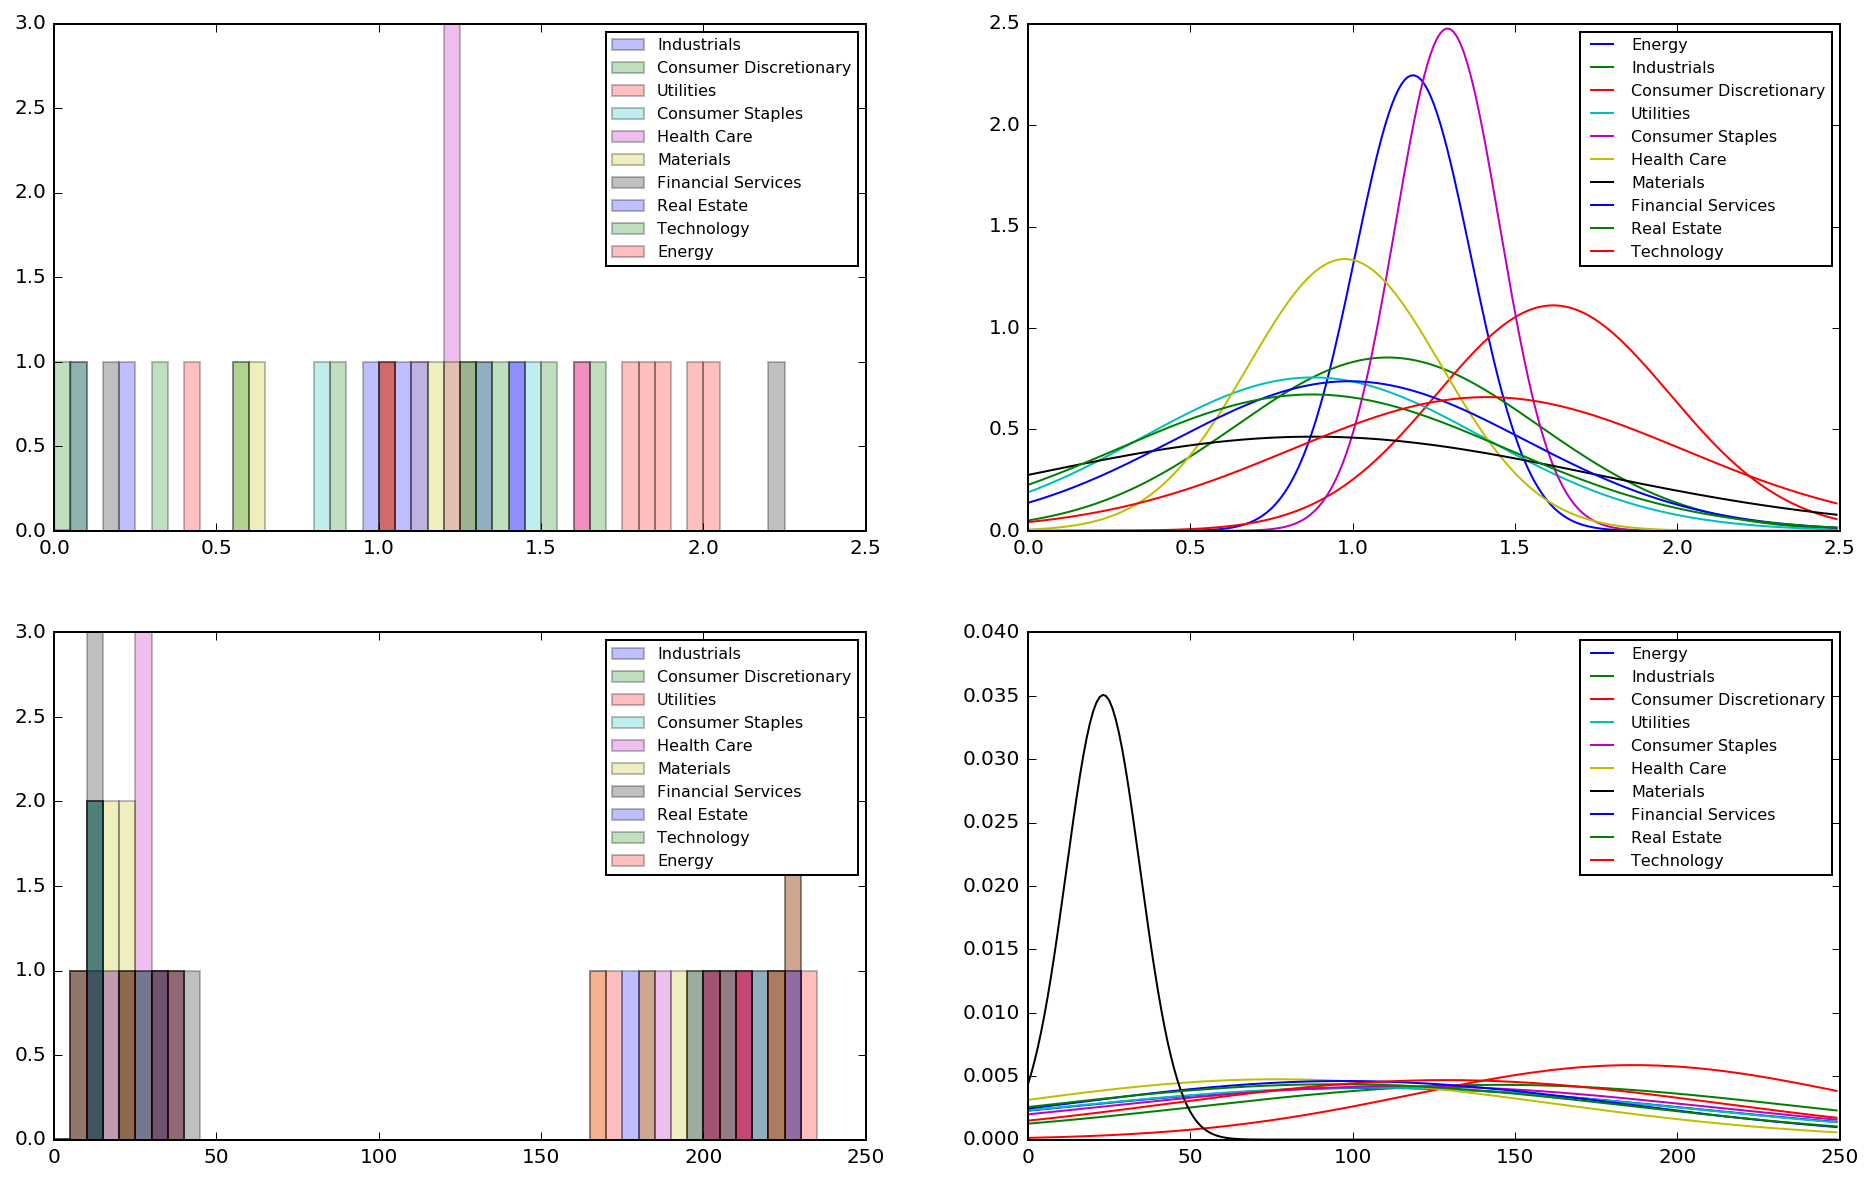

In [337]:
##
#1/f slopes in stocks
#hist
#highest/lowest slopes
'''

foofs = dict()
organized_tuple = collections.namedtuple("foofdat","centers bandwidths chi")
for x in xrange(len(pspec)):
    foof = FOOF(min_p=0.1,res = 1,fmin=3,fmax=245) #ignoring day trading
    foof.model(f[3:len(f)-5],np.expand_dims(pspec[x,3:len(f)-5].T,1))
    foofs[names[x]] = organized_tuple(foof.centers_,foof.stdevs_,foof.chi_)
'''

plt.figure(figsize=(16,10))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

#chis
mean_chis = []
std_chis = []

for label in set(labels):
    label_names = [names[i] for i,j in enumerate(labels) if j == label]    
    chis = []
    for label_name in label_names:
        chis.append(foofs[label_name].chi)
    mean_chis.append(np.mean(chis))
    std_chis.append(np.std(chis))
    ax1.hist(chis,bins=np.arange(0,2.5,0.05),alpha=0.25,label=label_references[int(label-1)])
    ax1.legend(prop={'size':8})

for label in xrange(len(set(labels))):
    ax2.plot(np.arange(0,2.5,0.01),mlab.normpdf(np.arange(0,2.5,0.01),mean_chis[label],std_chis[label]),label=label_references[int(label-1)])
ax2.legend(prop={'size':8})

# cfs
mean_cfs = []
std_cfs = []

for label in set(labels):
    label_names = [names[i] for i,j in enumerate(labels) if j == label]    
    cfs = []
    for label_name in label_names:
        cfs.extend([cf for cf in foofs[label_name].centers])
    mean_cfs.append(np.mean(cfs))
    std_cfs.append(np.std(cfs))
    ax3.hist(cfs,bins=np.arange(0,250,5),alpha=0.25,label=label_references[int(label-1)])
    ax3.legend(prop={'size':8})

for label in xrange(len(set(labels))):
    ax4.plot(np.arange(0,250,1),mlab.normpdf(np.arange(0,250,1),mean_cfs[label],std_cfs[label]),label=label_references[int(label-1)])
ax4.legend(prop={'size':8})


### Is there phase amplitude coupling in stocks?
Phase amplitude coupling is an analysis done on electrophysiological data where you can measure how oscillations of different frequencies interact. See here if you're interested: https://github.com/voytekresearch/tutorials/blob/master/Phase%20Amplitude%20Coupling%20Tutorial.ipynb

In [177]:
# example comodulogram

#mean and std comodulogram


In [183]:
# building a comodulogram
all_comodulograms = []
for ind1 in xrange(len(normalized_dat)):
    ind2 =ind1;
    padded_data1 = np.zeros(len(normalized_dat[ind1,:])*2) 
    padded_data1[0:len(normalized_dat[ind1,:])] = normalized_dat[ind1,:]
    padded_data1[len(normalized_dat[ind1,:]):len(padded_data1)] = [i for i in reversed(normalized_dat[ind1,:])]
    padded_data2 = np.zeros(len(normalized_dat[ind2,:])*2) 
    padded_data2[0:len(normalized_dat[ind2,:])] = normalized_dat[ind2,:]
    padded_data2[len(normalized_dat[ind2,:]):len(padded_data2)] = [i for i in reversed(normalized_dat[ind2,:])]

    comodulogram = pacpy.pac.comodulogram(lo=padded_data1,hi=padded_data2,
                                          p_range=(5,200),a_range=(50,240),
                                          dp=10,da=10,fs=500,pac_method='plv')
    all_comodulograms.append(comodulogram)

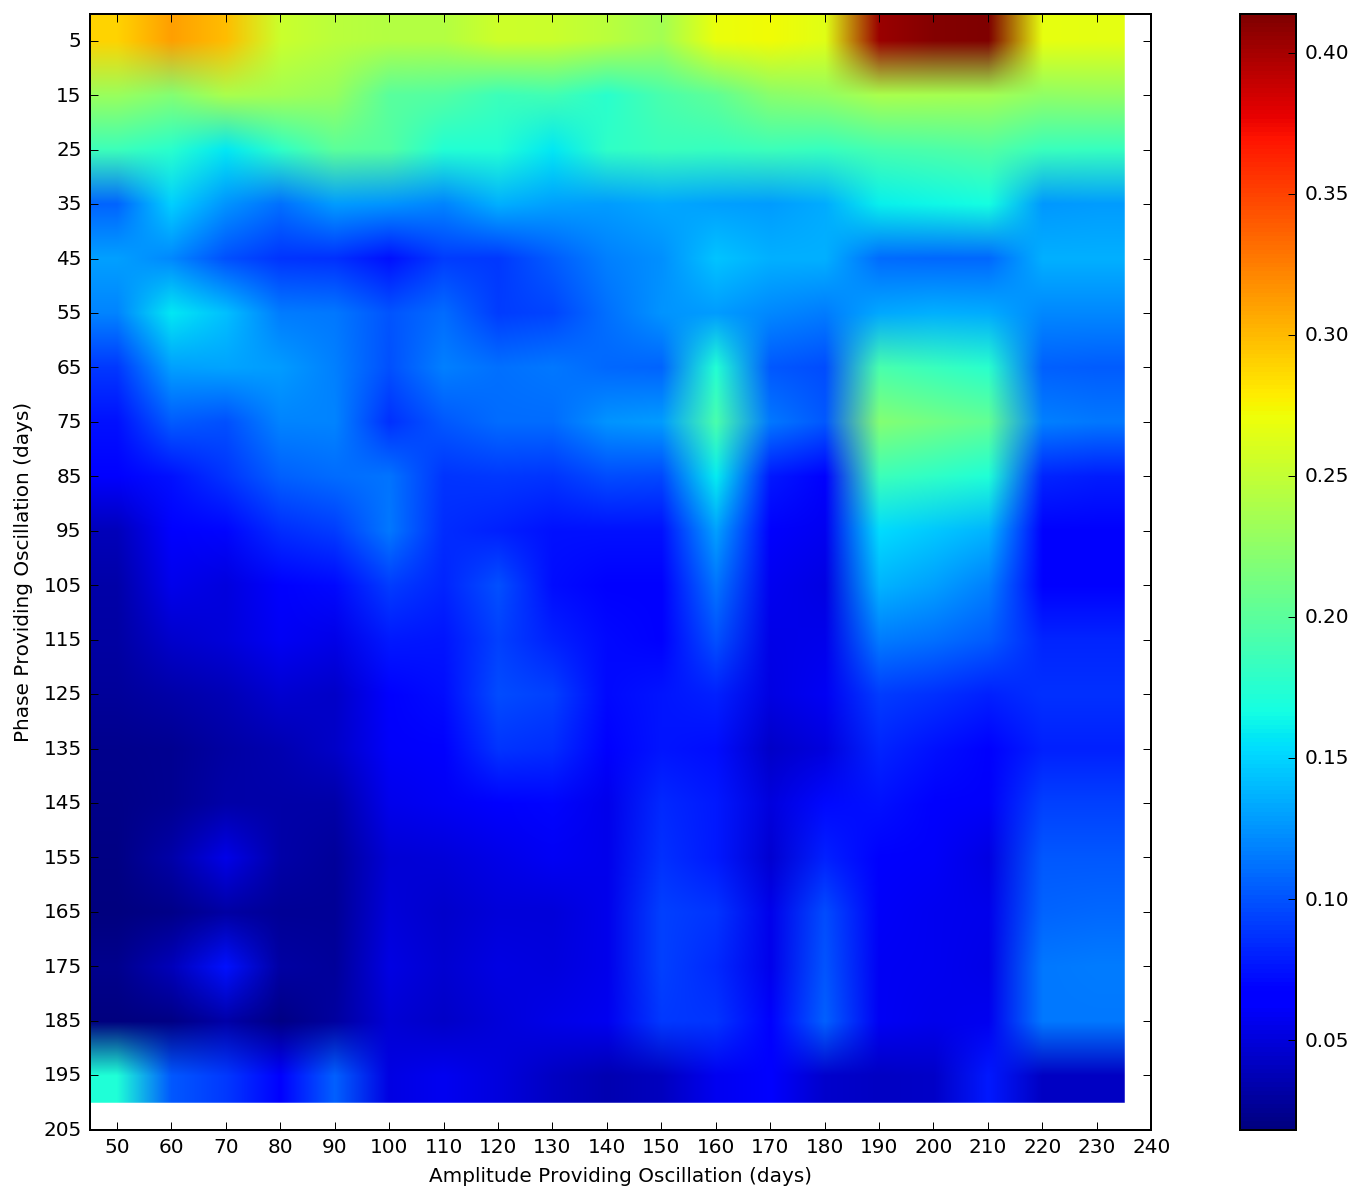

In [188]:
plt.figure(figsize = (16,10))
plt.imshow(np.mean(all_comodulograms,0))
plt.colorbar()
plt.xticks(range(0,len(range(50,250,10))),range(50,250,10))
plt.yticks(range(0,len(range(5,210,10))),range(5,210,10))
plt.xlabel('Amplitude Providing Oscillation (days)')
plt.ylabel('Phase Providing Oscillation (days)')

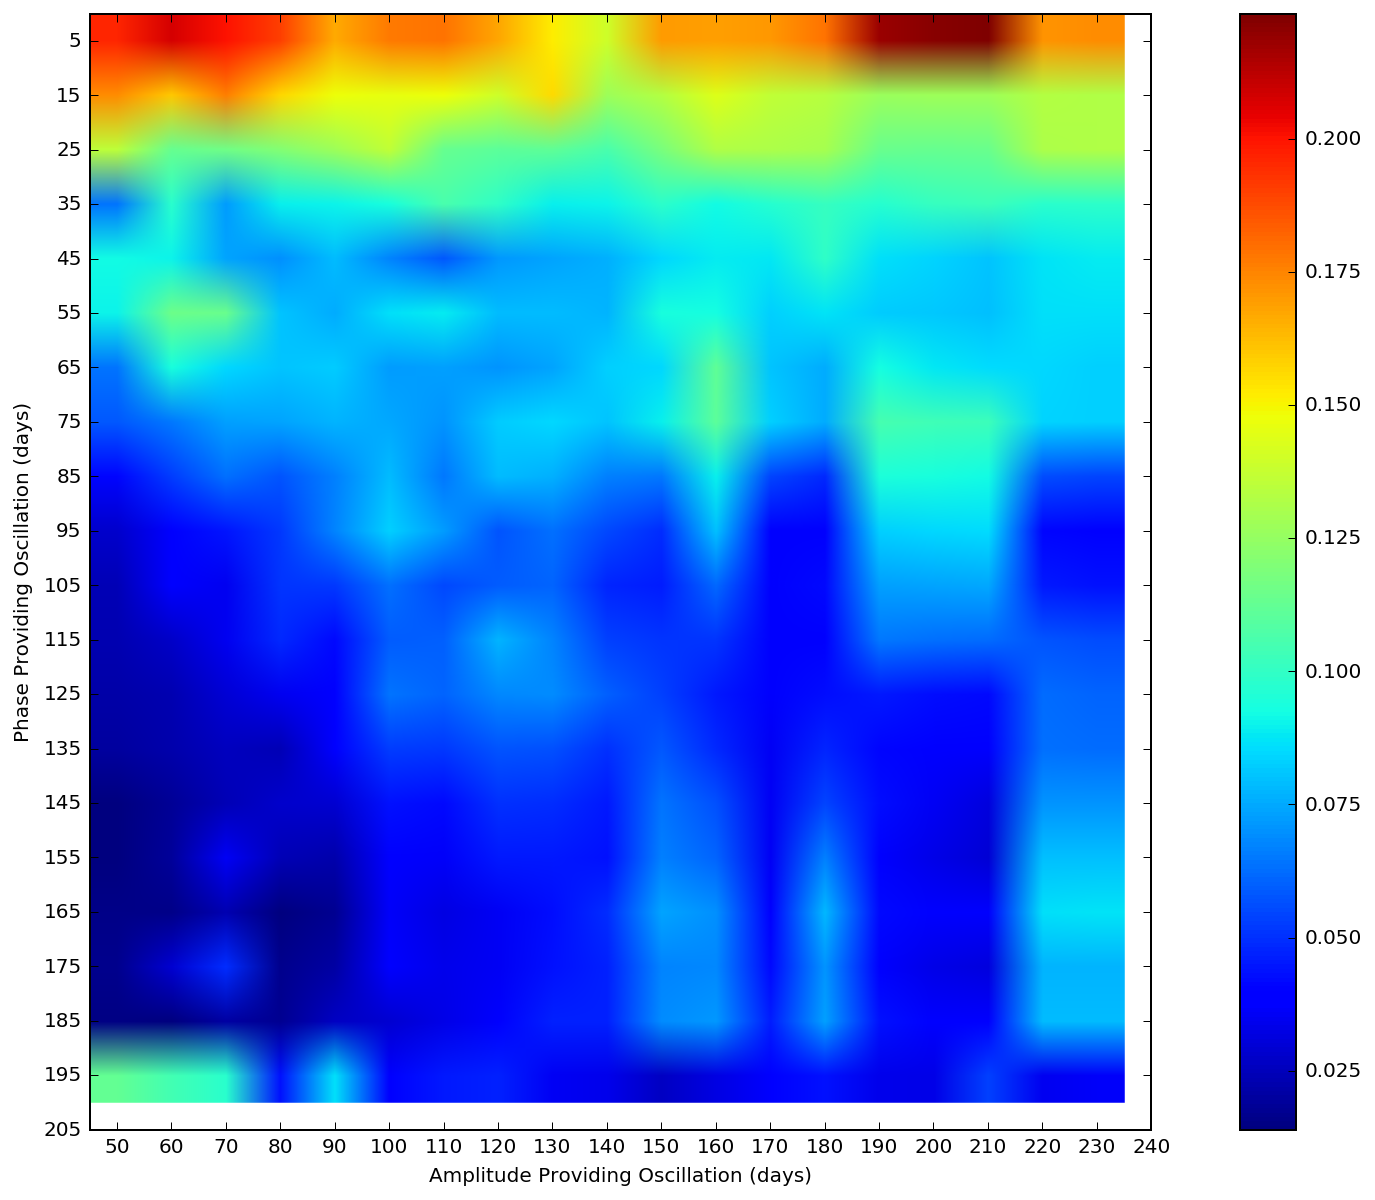

In [189]:
plt.figure(figsize = (16,10))
plt.imshow(np.std(all_comodulograms,0))
plt.colorbar()
plt.xticks(range(0,len(range(50,250,10))),range(50,250,10))
plt.yticks(range(0,len(range(5,210,10))),range(5,210,10))
plt.xlabel('Amplitude Providing Oscillation (days)')
plt.ylabel('Phase Providing Oscillation (days)')